In [0]:
# !pip install -U tables

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

plt.rcParams['figure.figsize'] = [20, 10]

In [0]:
cd /content/drive/My Drive/Colab Notebooks/dw-matrix2

/content/drive/My Drive/Colab Notebooks/dw-matrix2


In [0]:
ls

data/  LICENSE  matrix2-day2.ipynb  README.md


In [0]:
df = pd.read_hdf("data/car.h5")
df.shape

(106494, 155)

In [0]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

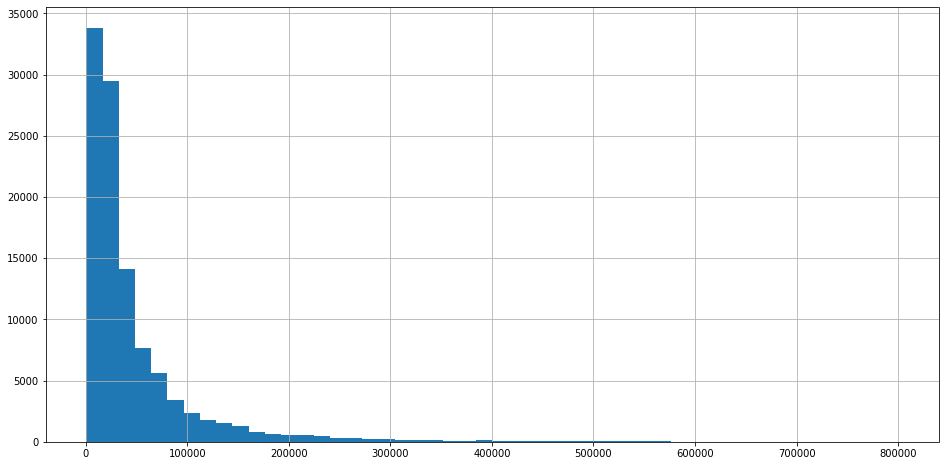

In [0]:
plt.rcParams['figure.figsize'] = [16, 8]
df["price_value"].hist(bins=50)

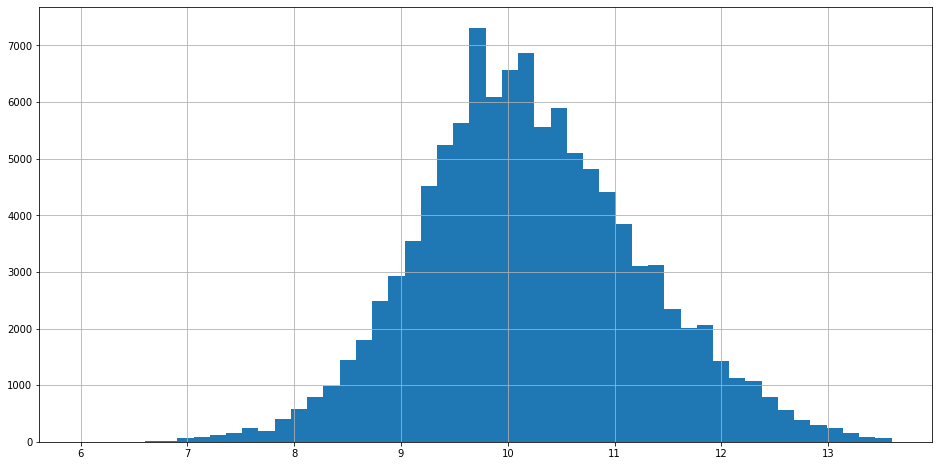

In [0]:
np.log1p(df["price_value"]).hist(bins=50)

In [0]:
df["price_value"].describe(percentiles=[.01,.05,.10,.25,.50,.75,.90,.95,.99])

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
1%         2600.000000
5%         5500.000000
10%        7800.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
90%      109000.000000
95%      165000.000000
99%      339990.000000
max      799900.000000
Name: price_value, dtype: float64

In [0]:
df["param_marka-pojazdu"].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [0]:
df["param_marka-pojazdu"].value_counts()[:30]

Volkswagen       11314
Opel              9773
BMW               8327
Audi              7960
Ford              7567
Renault           6267
Mercedes-Benz     5861
Toyota            5088
Škoda             4532
Peugeot           4462
Citroën           4040
Seat              2762
Volvo             2721
Fiat              2587
Nissan            2574
Hyundai           2573
Mazda             2311
Honda             2278
Kia               2121
Suzuki            1286
Mitsubishi        1198
Alfa Romeo         884
Jeep               866
Chevrolet          837
Mini               720
Dacia              599
Land Rover         530
Subaru             518
Porsche            459
Lexus              438
Name: param_marka-pojazdu, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44dfa21ef0>,
      dtype=object)

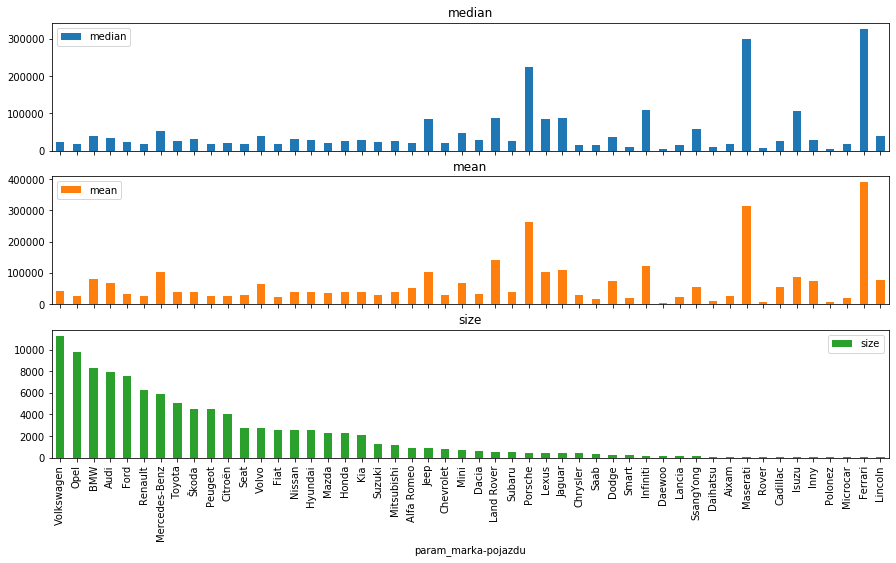

In [0]:
(
    df
    .groupby(["param_marka-pojazdu"])["price_value"]
    .agg([np.median,np.mean, np.size])
    .sort_values(by="size",ascending=False)
    .head(50)  
).plot(kind="bar", figsize=(15,8), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44dea10eb8>,
      dtype=object)

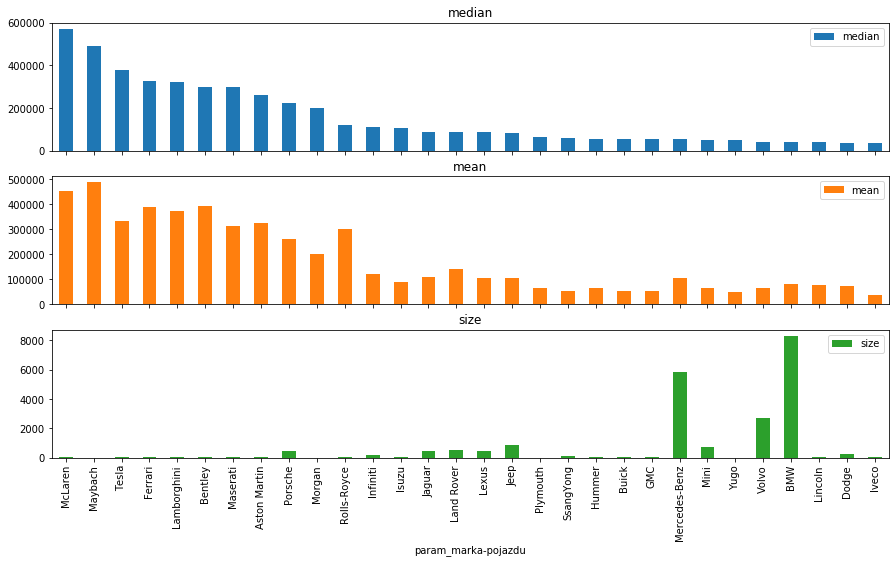

In [68]:
def car_plot(groupby_param, target_param="price_value", agg_functions=[np.median,np.mean, np.size], sort_by_param="median", top=30, subplots=True):

    return (
        df
        .groupby(groupby_param)[target_param]
        .agg(agg_functions)
        .sort_values(by=sort_by_param,ascending=False)
        .head(top)  
    ).plot(kind="bar", figsize=(15,8), subplots=subplots)


car_plot("param_marka-pojazdu")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44de3cf4a8>,
      dtype=object)

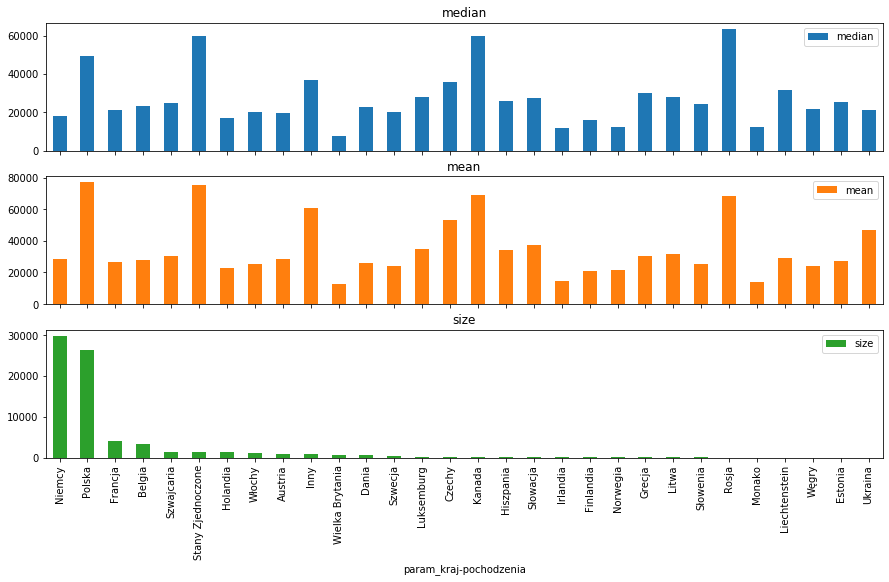

In [73]:
car_plot("param_kraj-pochodzenia", sort_by_param='size')